**Advanced Deep Learning 2023**

**Exercise 3**

**Juuso Paakkunainen 70579167**

Apply the CNN implementation with suitable node function from Exercise 1 to MNIST dataset, select one
optimizer out of four (SGD, RMSProp, AdaGrad and Adam) to plot training loss and validation loss by epoch,
training accuracy and validation accuracy by epoch, display the best result you have with suitable optimizer
parameters and explain why you select that specific number to your optimizer?


Note:
1. MNIST database link: http://yann.lecun.com/exdb/mnist/, in MNIST dataset 60000 images for
training and 10000 images for testing

In [ ]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
def elu(x, alpha=1.0):
    return tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label


Loading the MNIST dataset and normalizing the pictures

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


Building the CNN model

In [ ]:
def build_model(activation_function, optimizer):
    model = Sequential([
        layers.Reshape((28, 28, 1), input_shape=(28, 28)),
        layers.Conv2D(32, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10)
    ])
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title + ' - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title + ' - Accuracy')
    plt.legend()
    plt.show()

Training the model on the MNIST dataset

In [ ]:
# Define the sets of parameters to test
learning_rates = [0.01, 0.001]
momentum_values = [0.9, 0.95, 0.99]


Epoch 1/10
1875/1875 [==============================] - 24s 5ms/step - loss: 0.3715 - accuracy: 0.9158 - val_loss: 0.3536 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4705 - accuracy: 0.9038 - val_loss: 0.8787 - val_accuracy: 0.7984
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7560 - accuracy: 0.8215 - val_loss: 0.4079 - val_accuracy: 0.9073
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5510 - accuracy: 0.8757 - val_loss: 0.7131 - val_accuracy: 0.9091
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9478 - accuracy: 0.7582 - val_loss: 0.6686 - val_accuracy: 0.8142
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7127 - accuracy: 0.8434 - val_loss: 0.8689 - val_accuracy: 0.8543
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.4945 - accuracy: 0.5919 - val_loss: 2.0871 - val_accurac

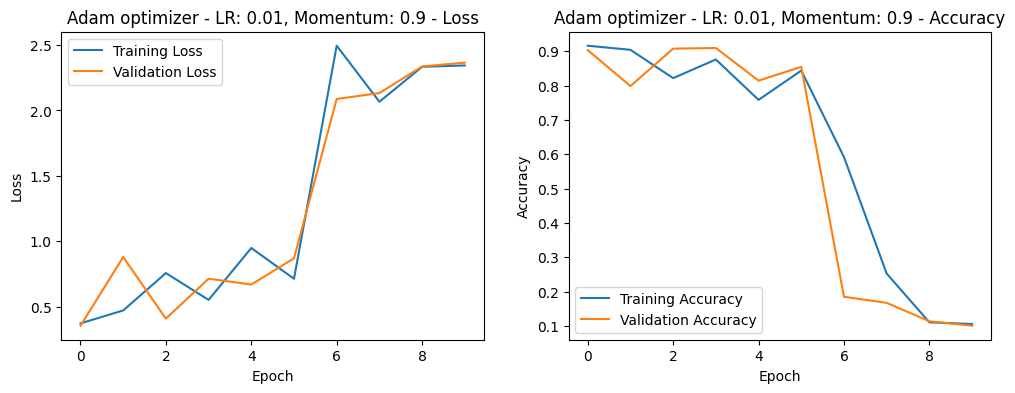

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3422 - accuracy: 0.9234 - val_loss: 0.2260 - val_accuracy: 0.9518
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3717 - accuracy: 0.9302 - val_loss: 0.4979 - val_accuracy: 0.9174
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4369 - accuracy: 0.9120 - val_loss: 0.4520 - val_accuracy: 0.9154
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5484 - accuracy: 0.8847 - val_loss: 0.6948 - val_accuracy: 0.8652
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7235 - accuracy: 0.8357 - val_loss: 0.4749 - val_accuracy: 0.9004
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9757 - accuracy: 0.7544 - val_loss: 0.9463 - val_accuracy: 0.8019
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3814 - accuracy: 0.5763 - val_loss: 1.2456 - val_accurac

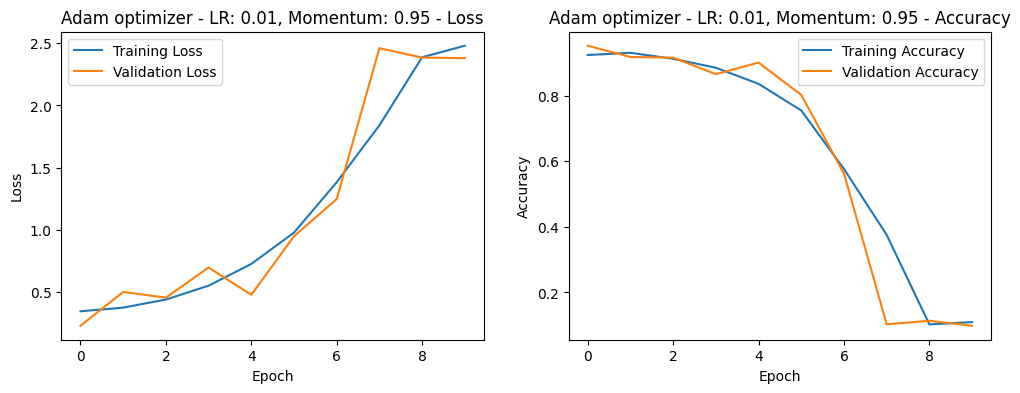

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3389 - accuracy: 0.9226 - val_loss: 0.1979 - val_accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6907 - accuracy: 0.8718 - val_loss: 0.4581 - val_accuracy: 0.9059
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4328 - accuracy: 0.9132 - val_loss: 0.4343 - val_accuracy: 0.8880
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4387 - accuracy: 0.9099 - val_loss: 0.4645 - val_accuracy: 0.9039
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5686 - accuracy: 0.8799 - val_loss: 0.8032 - val_accuracy: 0.8642
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6848 - accuracy: 0.8593 - val_loss: 0.5739 - val_accuracy: 0.8703
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8414 - accuracy: 0.7867 - val_loss: 0.6347 - val_accur

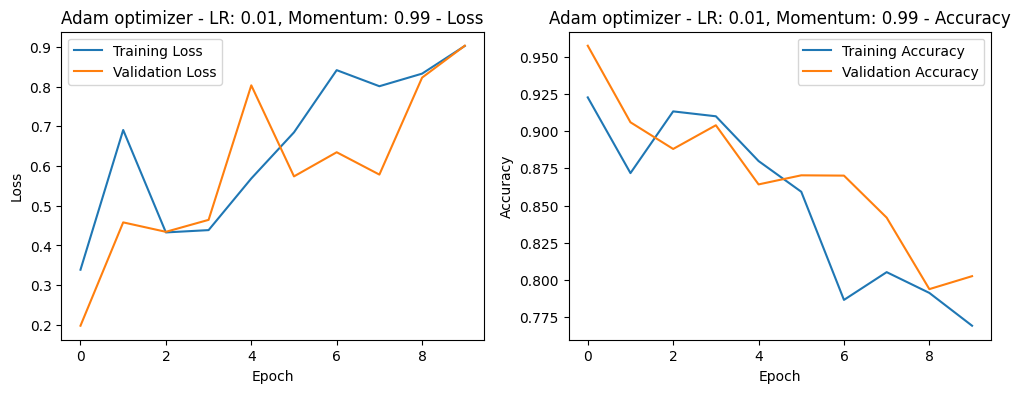

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1320 - accuracy: 0.9601 - val_loss: 0.0460 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.0437 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0372 - accuracy: 0.9889 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0358 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0490 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0408 - val_accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0187 - accuracy: 0.9947 - val_loss: 0.0581 - val_accu

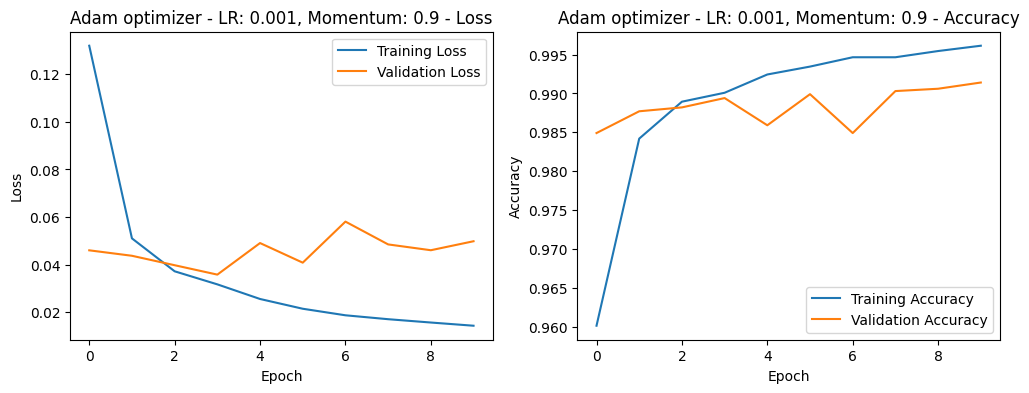

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1297 - accuracy: 0.9602 - val_loss: 0.0574 - val_accuracy: 0.9799
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0378 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0423 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0302 - accuracy: 0.9912 - val_loss: 0.0330 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0358 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0472 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0196 - accuracy: 0.9944 - val_loss: 0.0471 - val_accur

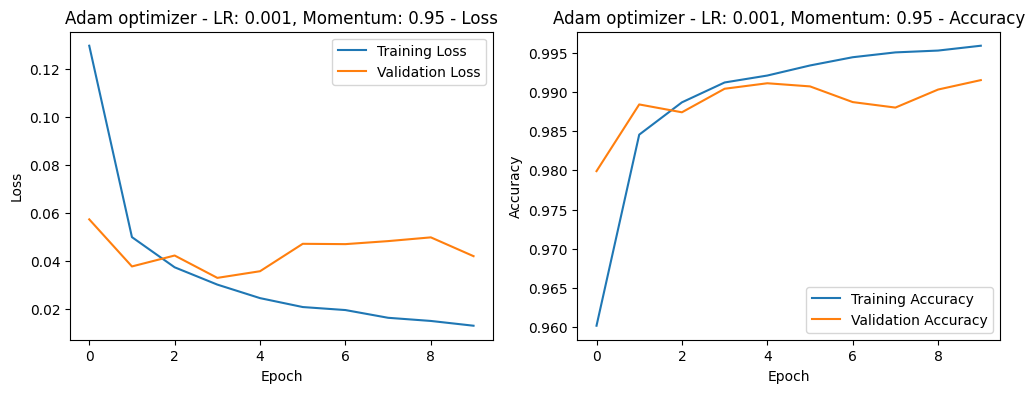

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1507 - accuracy: 0.9543 - val_loss: 0.0487 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0590 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.0421 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0460 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0423 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0385 - val_accu

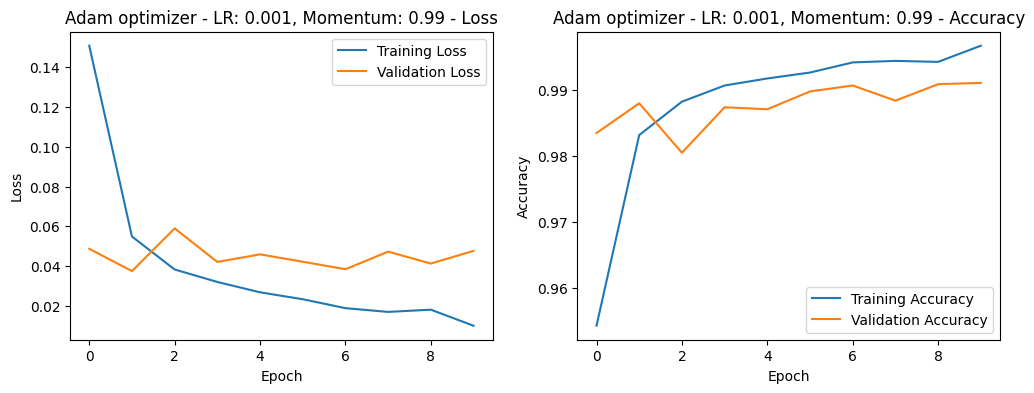

In [ ]:
for learning_rate in learning_rates:
    for momentum in momentum_values:
        # Build and train the model with the specified optimizer parameters
        adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum)
        model = build_model(activation_function='elu', optimizer=adam)
        history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        # Plot the results
        title = f'Adam optimizer - LR: {learning_rate}, Momentum: {momentum}'
        plot_history(history, title=title)

**Conclusion**

Adam was selected as the optimizers, as it received the best results in Exercise 2. I decided to try the same set of parameters, but increase the amount of epochs trained. The results were similar to exercise 2. With higher learning rates the model starts heavily diverging and the accuracy shoots down. Best results were again obtained with lower learning rates. Momentum did play  a significant role in the overall accuracy of the model